In [7]:
import os
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, to_rgba
from matplotlib.ticker import StrMethodFormatter

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/var/folders/xf/593p9qkj38s0m2gtl3jmd8n80000gn/T/ipykernel_60145/561988529.py:29: SyntaxWarning: invalid escape sequence '\s'
  m19 = pd.read_csv("data/moon_temp_snapshot_half_deg.txt", sep='\s+',header=None)


(360, 720)


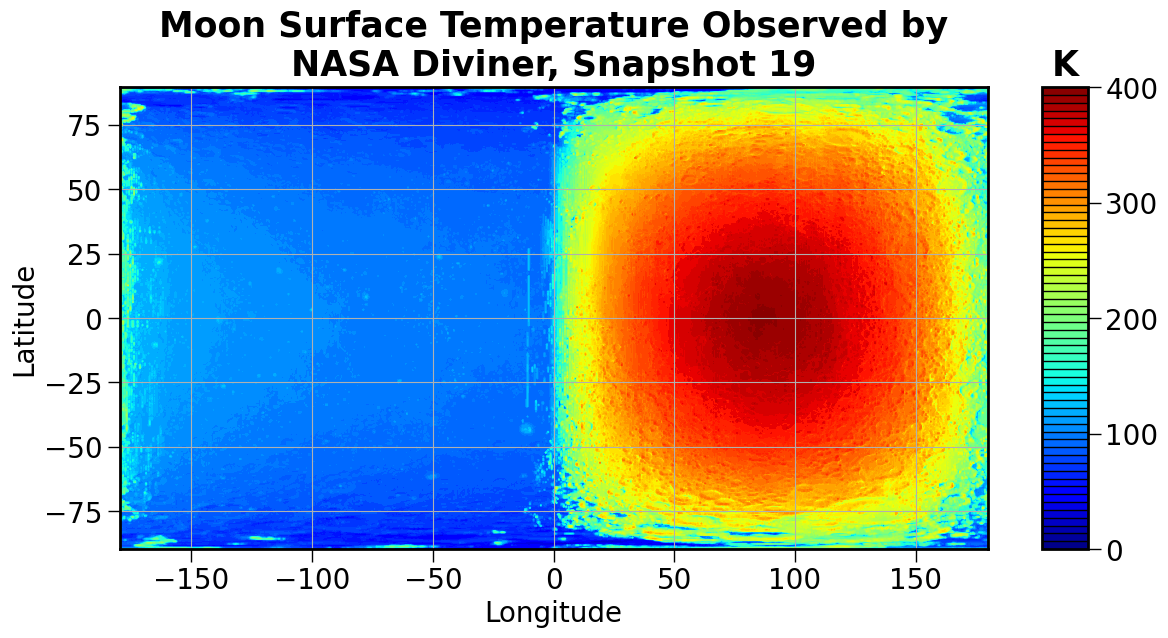

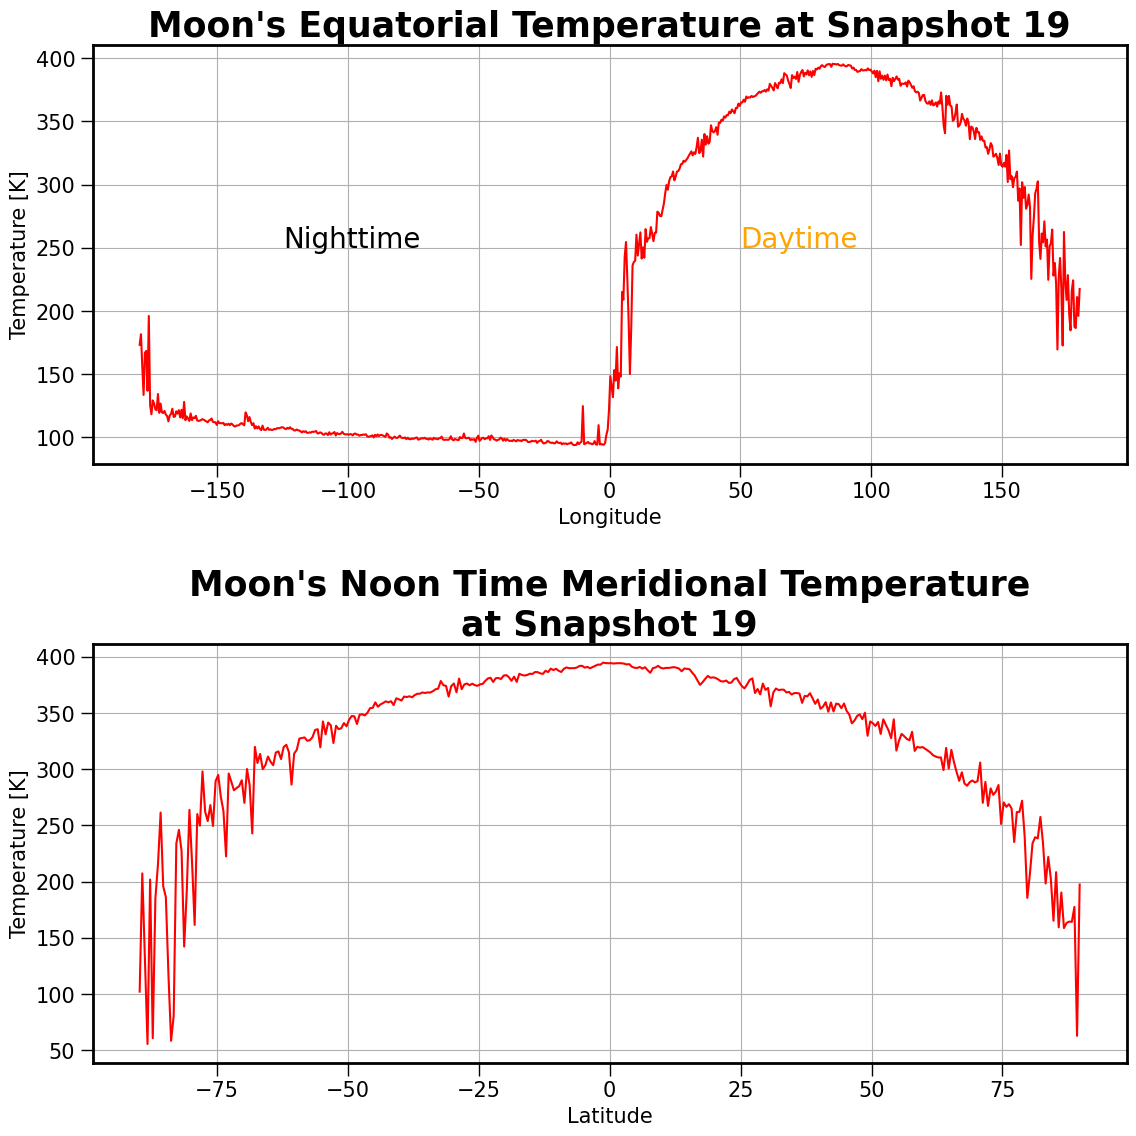

In [8]:
#Define graphic styles with font and figure sizes etc
styledict = {'xtick.labelsize':25,
            'xtick.major.size':9,
            'xtick.major.width':1,
            'ytick.labelsize':25,
            'ytick.major.size':9,
            'ytick.major.width':1,
            'legend.framealpha':0.0,
            'legend.fontsize':15,
            'axes.labelsize':20,
            'axes.titlesize':25,
            'axes.linewidth':2,
            'figure.figsize':(12,8),
            'savefig.format':'jpg'}
plt.rcParams.update(**styledict)
def new_col_map(colors):
    """
    This function creates a new color map from a list of colors given as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 4, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 4, axis = 0)
    v = cm.get_cmap('viridis'
    , 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0),last, axis=0))
# Load data
m19 = pd.read_csv("data/moon_temp_snapshot_half_deg.txt", sep='\s+',header=None)
mapmat = np.array(m19.iloc[:,2]).reshape(720,360).T # '.T' transposes array
print(mapmat.shape)

lat1 = np.linspace(-89.75, 89.75, 360)
lon1 = np.linspace(-179.75, 179.75, 720)
# Arrays representing latitude and longitude of the moon.

# colors = ['blue', 'green','skyblue','yellow',
#'orange', 'pink', 'red', 'maroon']
# myColMap = new_col_map(colors)
# A list of colors and new_col_map() to create a matplotlib color map.

mapmat[mapmat == mapmat.max()] = 400
mapmat[mapmat == mapmat.min()] = 0
# This is called logical indexing. It allows you to index into parts
# of an array where the given condition in the brackets is true, as
# opposed to numerical where it goes by index. Also, all numpy arrays
# have a max() and min() member that returns the greatest and smallest
# element in the array respectively.

clev = np.linspace(mapmat.min(), mapmat.max(), 60)
# The number of 'level curves' in the filled contour plot below.

#Plot the moon temperature map
plt.figure(figsize=(14,6))
contf = plt.contourf(lon1, lat1, mapmat, clev, cmap='jet')

# plt.contourf allows you to create a filled (color-coded) contour plot.
colbar = plt.colorbar(contf, drawedges=True, ticks=[0, 100, 200, 300, 400],aspect = 10)
colbar.ax.set_title('K',fontweight="bold", pad = 8)
colbar.ax.tick_params(labelsize=20)
# plt.colorbar uses an existing contourf handle (like contf) to create
# a colorbar corresponding to the contourf.

plt.title("Moon Surface Temperature Observed by\n"
"NASA Diviner, Snapshot 19",fontweight="bold", pad = 8)
plt.xlabel("Longitude",size=20)
plt.ylabel("Latitude",size=20)
plt.tick_params(labelsize=20)
# plt.text allows you to put text in your plot at the given coordinates,
# here its (205, 95). The coordinates used correspond to those defined
# by the x and y axes of the plot.

plt.grid()
# plt.grid adds gridlines to the plot anchored at the same location as
# the ticks on the axes.

# plt.savefig lets you save the figure created with the given filename.
# plt.savefig("DivinerSurfaceTempMoon.jpg", bbox_inches='tight');

equ = np.where((lat1 < .5) & (lat1 > -.5))[0]
equatorial = mapmat[equ[0]]
# np.where accepts a logical expression on an array and returns an array
# of indices where that logical expression is true. That array can be
# used as non-consecutive indices in another array, similar to logical indexing.
merid = np.where((lon1 < 90.5) & (lon1 > 89.5))[0]
meridion = mapmat[:, merid[0]]
# changing figure size back to previously specified settings
plt.rcParams['figure.figsize'] = (12,8)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
# This is an alternate way to create plots. ax is an array of plot
# handles of shape (2, 1), and fig is the handle for the whole figure.

ax[0].plot(lon1, equatorial, 'r-')
ax[0].text(-125, 250,
"Nighttime", size=20)
ax[0].text(50, 250,
"Daytime", size=20, color='orange')
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel("Longitude",size=15)
# optional to add the degree symbol to the axis ticks
ax[0].set_ylabel("Temperature [K]",size=15)
ax[0].set_title("Moon's Equatorial Temperature at Snapshot 19",fontweight="bold")
ax[0].grid()
# As ax is an array, ax[0] refers to it's first plot and ax[1] refers
# to it's second. The previously used member functions can be applied
# to each plot separately, as can be seen above and below.
ax[1].plot(lat1, meridion, 'r-')
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel("Latitude",size=15)
ax[1].set_ylabel("Temperature [K]",size=15)
ax[1].set_title("Moon's Noon Time Meridional Temperature\nat Snapshot 19",fontweight="bold")
ax[1].grid()
fig.tight_layout(pad=3)
# fig.tight_layout sets the spacing between plots in the figure.
#fig.savefig("MoonEquatorialMeridionalTemp.jpg")